<a href="https://colab.research.google.com/github/DarkLord-13/Machine-Learning-01/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Transfer Learning

It is a deep learning technique where we use pre-trained model.

This pre-trained model is trained for one task and can be re-trained for a similar task with a smaller dataset.

Transfer modell gives higher accuracy compared to training models from scratch.

e.g. of pre-trained models
1.    VGG-16
2.    ResNet50
3.    Inceptionv3
4.    MobileNet V2

#WorkFlow:

Dataset -> Image processing -> TrainTestSplit -> PreTrained MobileNet Model -> MobileNet model trained on DOG and CAT 

search cats vs dogs on google->open kaggle-> go to accounts and create a token(json file will be downloaded)->upload it on your colab file

(dont forget to accept the competition rules)

In [ ]:
#installing kaggle library
!pip install Kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#configuring the path of Kaggle.json file
#Kaggle.json file contains your account credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#importing dogs vs cats dataset from kaggle
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

dogs-vs-cats.zip  kaggle.json  sampleSubmission.csv  train
image_resized	  sample_data  test1.zip	     train.zip


In [ ]:
#extracting the compressed file
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('dataset is extracted')


dataset is extracted


In [ ]:
#extracting the compressed file
from zipfile import ZipFile

dataset = '/content/train.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('dataset is extracted')


dataset is extracted


In [ ]:
import os
#counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print("Number of Images:  ", file_count)

Number of Images:   25000


Printing the name of the images

In [ ]:
file_names = os.listdir('/content/train') #list of names of all the images of dogs and cats

In [ ]:
print(file_names)

['dog.10919.jpg', 'dog.11251.jpg', 'dog.9949.jpg', 'cat.1506.jpg', 'dog.7432.jpg', 'dog.5162.jpg', 'dog.11697.jpg', 'dog.2446.jpg', 'cat.1615.jpg', 'dog.5418.jpg', 'dog.11166.jpg', 'dog.1858.jpg', 'dog.2048.jpg', 'dog.718.jpg', 'cat.10126.jpg', 'dog.5436.jpg', 'cat.8467.jpg', 'dog.10817.jpg', 'dog.11059.jpg', 'cat.12404.jpg', 'dog.10163.jpg', 'dog.4148.jpg', 'cat.9389.jpg', 'dog.11925.jpg', 'cat.5405.jpg', 'dog.6716.jpg', 'cat.4459.jpg', 'cat.9556.jpg', 'dog.5287.jpg', 'dog.9849.jpg', 'cat.8613.jpg', 'cat.3119.jpg', 'cat.9399.jpg', 'dog.8444.jpg', 'dog.11619.jpg', 'cat.2005.jpg', 'dog.9055.jpg', 'dog.4561.jpg', 'cat.6019.jpg', 'cat.9775.jpg', 'dog.11946.jpg', 'dog.680.jpg', 'dog.12268.jpg', 'dog.2526.jpg', 'cat.5158.jpg', 'dog.6405.jpg', 'dog.4498.jpg', 'dog.3523.jpg', 'dog.10831.jpg', 'dog.6067.jpg', 'dog.5329.jpg', 'dog.7413.jpg', 'dog.494.jpg', 'cat.3171.jpg', 'cat.2073.jpg', 'dog.1859.jpg', 'dog.9927.jpg', 'cat.3300.jpg', 'cat.6654.jpg', 'cat.7472.jpg', 'cat.8071.jpg', 'dog.3081.jp

Importing the sependencies

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of dogs and cats

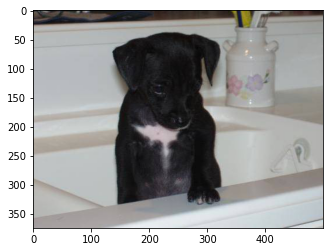

In [ ]:
#display dog image
img = mpimg.imread('/content/train/dog.8298.jpg')  #this iwll read the image file
imgplot = plt.imshow(img)
plt.show()

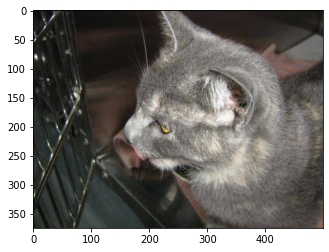

In [ ]:
#display cat image
img = mpimg.imread('/content/train/cat.1506.jpg')  #this iwll read the image file
imgplot = plt.imshow(img)
plt.show()

In [ ]:
#counting the number of cats and dogs images
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0]  #as the first char of dog image will be 'd' and for cat will be 'c'

  if name == 'd':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


#Resizing all the images
We will be using MobileNet V2 -> which needs all the images of same size

In [ ]:
#creating a directory for all the resized images
os.mkdir('/content/image_resized')

In [ ]:
#checking no of files in the image_resized directory
import os

# folder path
dir_path = r'/content/image_resized'
count = 0
# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('File count:', count)

File count: 2000


In [ ]:
#assigning folder address path to a variable
original_folder = '/content/train/'
resized_folder = '/content/image_resized/'

In [ ]:
for i in range(2000):
  filename = os.listdir(original_folder)[i]
  img_path = original_folder + filename #now we have the complete address of an original image

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder + filename  #crated the new address of the resized image which is to be saved in the resized folder
  img.save(newImgPath)  #now saving the resized image to new director where the 2000 resized images will be saved

In [ ]:
#displaying resized cat image
img = mpimg.imread('/content/image_resized/dog.10919.jpg')
imgplt = plt.imshow(img)
plt.show()

#Labelling 
0->CATS, 1->DOGS

In [ ]:
#creating a for loop to assign labels
filenames = os.listdir('/content/image_resized')
labels = [] #this will store 0 and 1 for cats and dogs in same order as resized_image director

for i in range(2000):

  file_name = filenames[i]
  first_char = file_name[0]
  
  if first_char=='d':
    labels.append(1)
  else:
    labels.append(0)

In [ ]:
print(filenames[0:5])
print(len(filenames))

['dog.10919.jpg', 'dog.11251.jpg', 'dog.9949.jpg', 'cat.1506.jpg', 'dog.7432.jpg']
2000


In [ ]:
print(labels[0:5])
print(len(labels))

[1, 1, 1, 0, 1]
2000


In [ ]:
#counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 996 1004]


#Converting all resized image into numpy arrays

In [ ]:
import cv2
import glob

In [ ]:
image_directory = '/content/image_resized/' #contains all the 2000 images
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]  #e is to accept the image as jpg or png
dog_cat_images = np.asarray([cv2.imread(file) for file in files]) #converting every image to array

In [ ]:
x = dog_cat_images
y = np.asarray(labels)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
#training images -> 1600
#testing images -> 400

In [ ]:
#scaling the data -> as of now the image matrix has value from 0 to 255, in order to make this between the range of 0 to 1 we divide it by 255
x_train_scaled = x_train/255
x_test_scaled = x_test/255

#Building the neural network

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [ ]:
num_of_classes = 2

model = tf.keras.Sequential([
    
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)#only one parameters, i.e. is the output parameter

])

model.summary()

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
model.fit(x_train_scaled, y_train, epochs=5)
model.fit()

Epoch 1/5
50/50 [==============================] - 50s 932ms/step - loss: 0.2147 - acc: 0.9131
Epoch 2/5
50/50 [==============================] - 40s 794ms/step - loss: 0.0731 - acc: 0.9737
Epoch 3/5
50/50 [==============================] - 42s 835ms/step - loss: 0.0532 - acc: 0.9825
Epoch 4/5
50/50 [==============================] - 41s 821ms/step - loss: 0.0422 - acc: 0.9856
Epoch 5/5
50/50 [==============================] - 40s 796ms/step - loss: 0.0341 - acc: 0.9912


In [ ]:
score, acc = model.evaluate(x_test_scaled, y_test)

13/13 [==============================] - 10s 754ms/step - loss: 0.0289 - acc: 0.9925


In [ ]:
print("loss: ",score)
print("test accuracy: ",acc)

loss:  0.028858328238129616
test accuracy:  0.9925000071525574


#Predictive System

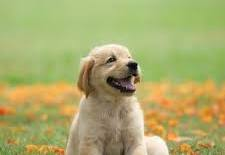

1/1 [==============================] - 0s 47ms/step
[[-3.2136889  3.1286097]]
The image is of a DOG


In [ ]:
input_image_path = '/content/download.jpg'#took a picture of dog from the net
input_image = cv2.imread(input_image_path)#converts to array
cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224, 224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])

input_prediction = model.predict(image_reshaped)
print(input_prediction)

#input_prediction will give the probablity of the image being a cat or dog, np.argmax takes the highest probablity 
#e.g. -> input_prediction will give this [0.15, 0.85], max value is 0.85, which is the 2nd value. therefore dog

input_prediction_label = np.argmax(input_prediction)

if(input_prediction_label==0):
  print("The image is of a CAT")
else:
  print("The image is of a DOG")